In [18]:
import numpy as np
import matplotlib.pyplot as plt
import eispac
import sunpy 
import sunpy.map
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
from scipy.io import readsav
from copy import deepcopy
import astropy.units as u
from astropy.coordinates import SkyCoord
from regions import (PolygonSkyRegion,EllipsePixelRegion, PixCoord)
import h5py

In [19]:
def get_vel_from_cs_regions(vel_map, cs_regions):
    intensity = []
    masks = [np.where(cs_region.contains(sunpy.map.all_coordinates_from_map(vel_map), 
                                                vel_map.wcs)) for cs_region in cs_regions]
    intensity = [vel_map.data[mask_] for mask_ in masks]
    return intensity

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                  bbox_to_anchor=(1.02, 0., 1, 1)):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
data_filepath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.data.h5"

In [20]:
fe_12_195_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_12_195_119.1c-0.fit.h5"
fe_13_202_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_13_202_044.1c-0.fit.h5"
fe_10_184_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_10_184_536.1c-0.fit.h5"
o__06_184_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.o__06_184_117.1c-0.fit.h5"
fe_08_185_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_08_185_213.1c-0.fit.h5"
fe_09_197_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_09_197_862.1c-0.fit.h5"
si_10_258_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.si_10_258_375.1c-0.fit.h5"
si_10_261_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.si_10_261_058.1c-0.fit.h5"
fe_14_264_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_14_264_787.1c-0.fit.h5"
si_07_275_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.si_07_275_368.1c-0.fit.h5"
mg_07_276_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.mg_07_276_153.1c-0.fit.h5"
mg_07_280_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.mg_07_280_737.1c-0.fit.h5"
fe_11_188_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_11_188_216.2c-0.fit.h5"

In [5]:
def plot_dhb_int_and_vel(fit_file, return_map=False,vmin=-10,vmax=10,corr="column",rest_wave=None):
    fit_res = eispac.read_fit(fit_file)
    fit_res.calculate_velocity(corr_method=corr,rest_wave=rest_wave)
    int_map = fit_res.get_map(component=0, measurement="intensity")
    vel_map = fit_res.get_map(component=0, measurement="vel")
    
    vel_map.plot_settings["norm"] = plt.Normalize(vmin=vmin,vmax=vmax)

    fig = plt.figure(figsize=(7,5),layout="constrained")

    ax1 = fig.add_subplot(121, projection=int_map)
    int_map.plot(axes=ax1)
    plot_colorbar(ax=ax1,im=ax1.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=10)
    ax1.set_title(" ".join(int_map.name.split(" ")[2:6]))

    ax2 = fig.add_subplot(122, projection=vel_map)
    vel_map.plot(axes=ax2)
    plot_colorbar(ax=ax2,im=ax2.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=10)
    ax2.set_title(" ".join(int_map.name.split(" ")[2:6]))

    if return_map:
        return int_map, vel_map

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_12_195_119.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


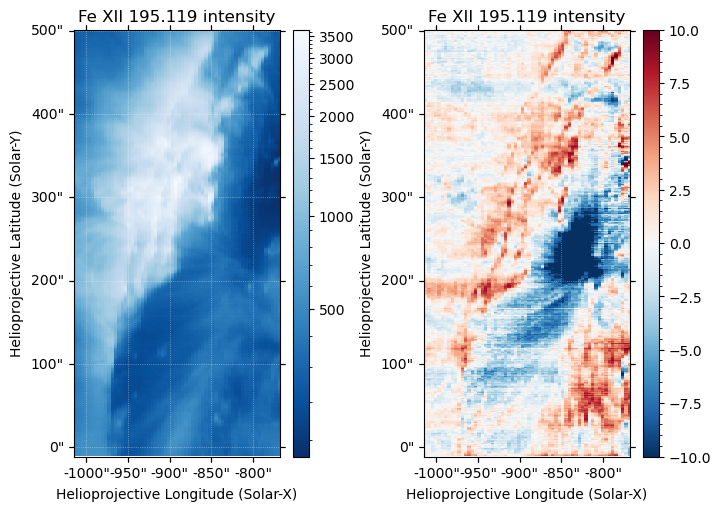

In [6]:
fe_12_195_int_map, fe_12_195_vel_map = plot_dhb_int_and_vel(fe_12_195_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_13_202_044.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


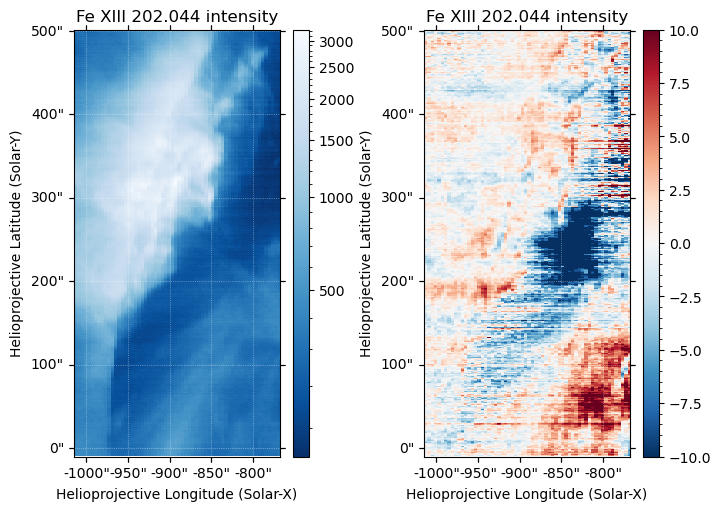

In [22]:
fe_13_202_int_map, fe_13_202_vel_map = plot_dhb_int_and_vel(fe_13_202_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_11_188_216.2c-0.fit.h5


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


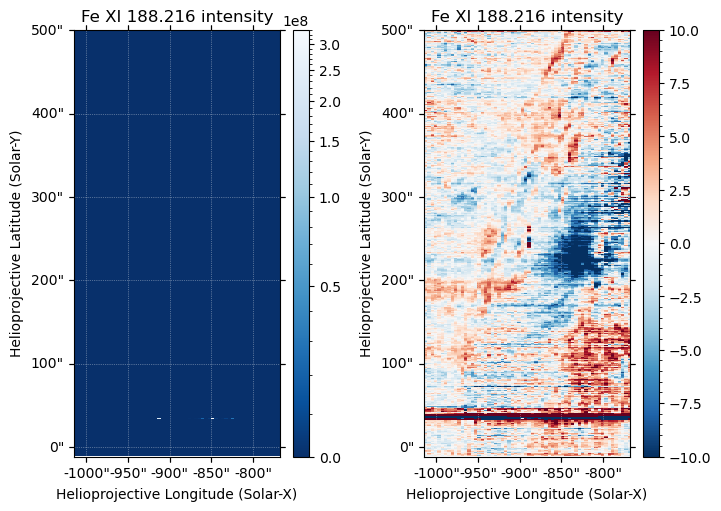

In [24]:
fe_11_188_int_map, fe_11_188_vel_map = plot_dhb_int_and_vel(fe_11_188_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_10_184_536.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


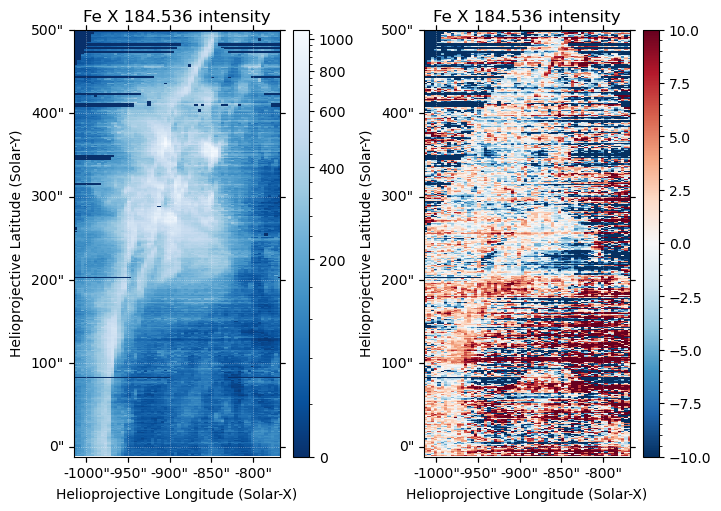

In [23]:
fe_10_184_intmap, fe_10_184_velmap = plot_dhb_int_and_vel(fe_10_184_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.o__06_184_117.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


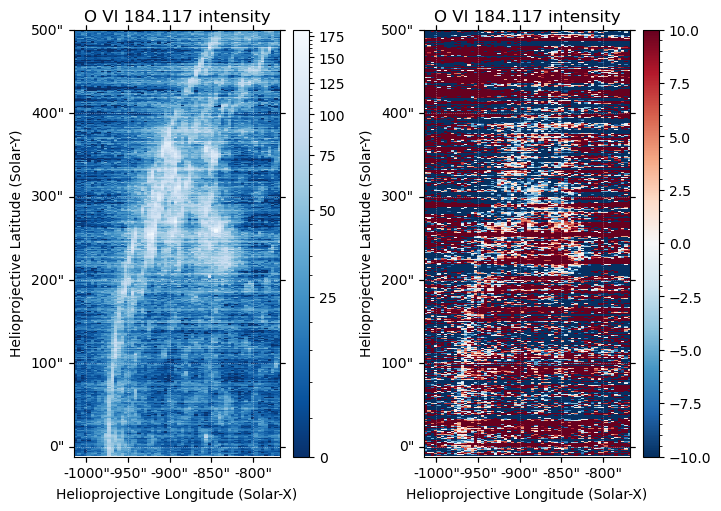

In [9]:
plot_dhb_int_and_vel(o__06_184_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_08_185_213.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


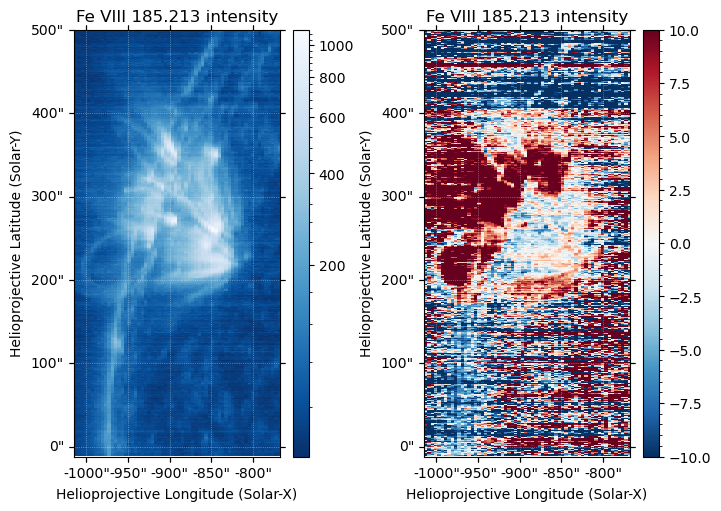

In [10]:
fe_08_185_intmap, fe_08_185_velmap = plot_dhb_int_and_vel(fe_08_185_1c_fitpath,corr="column", return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_09_197_862.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


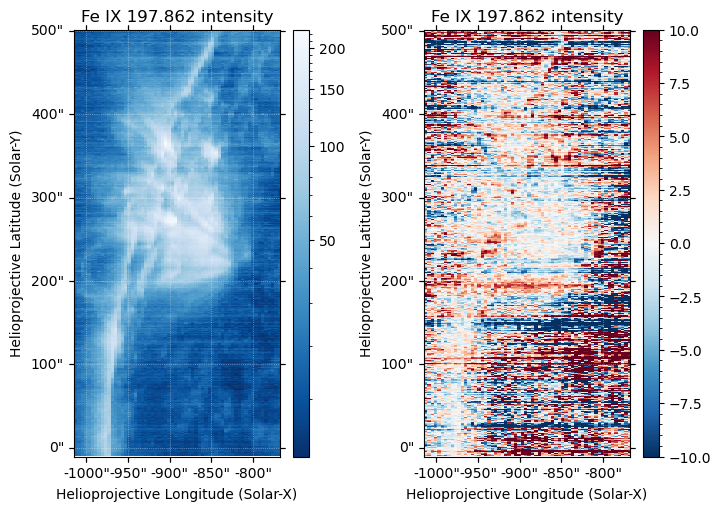

In [11]:
fe_09_197_intmap, fe_09_197_velmap = plot_dhb_int_and_vel(fe_09_197_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.si_10_258_375.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


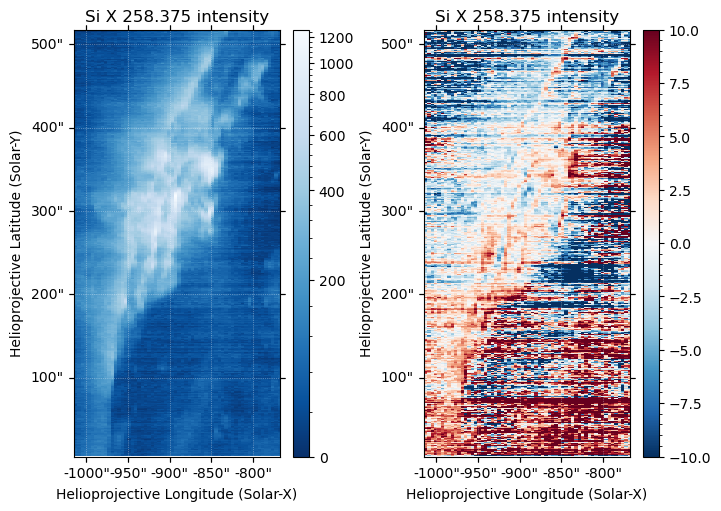

In [12]:
plot_dhb_int_and_vel(si_10_258_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.si_10_261_058.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


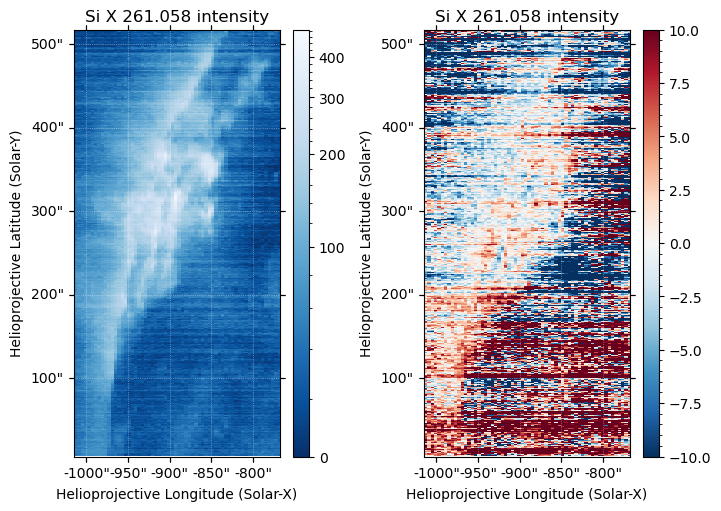

In [13]:
plot_dhb_int_and_vel(si_10_261_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_14_264_787.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


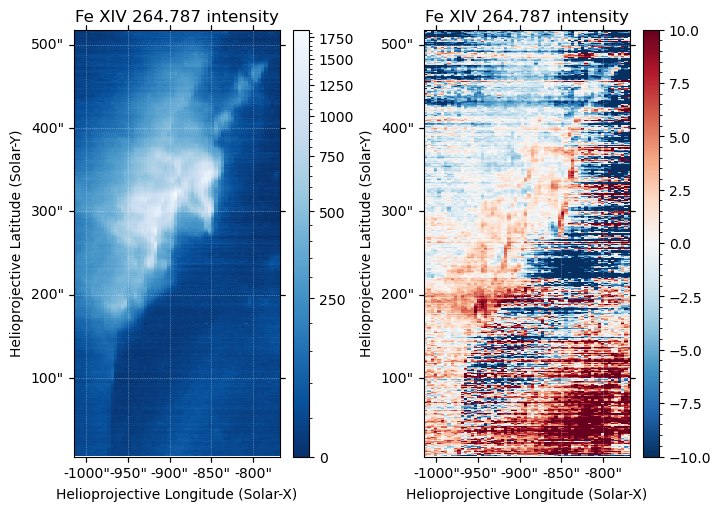

In [14]:
plot_dhb_int_and_vel(fe_14_264_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.si_07_275_368.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


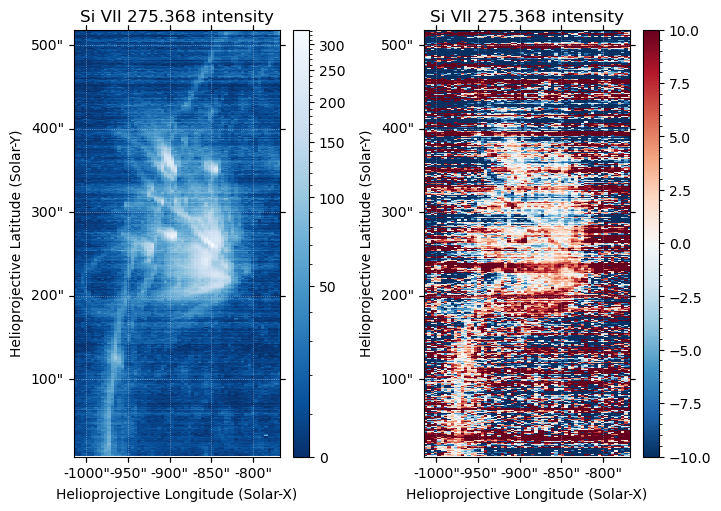

In [25]:
si_07_275_int_map, si_07_275_vel_map = plot_dhb_int_and_vel(si_07_275_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.mg_07_276_153.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


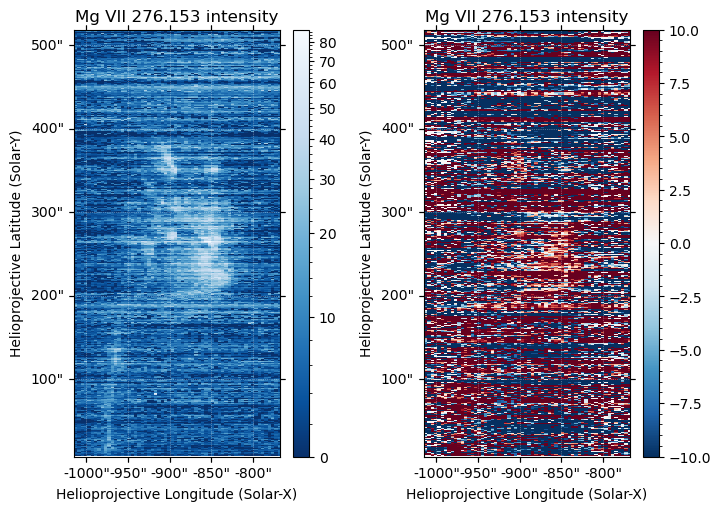

In [16]:
plot_dhb_int_and_vel(mg_07_276_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.mg_07_280_737.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


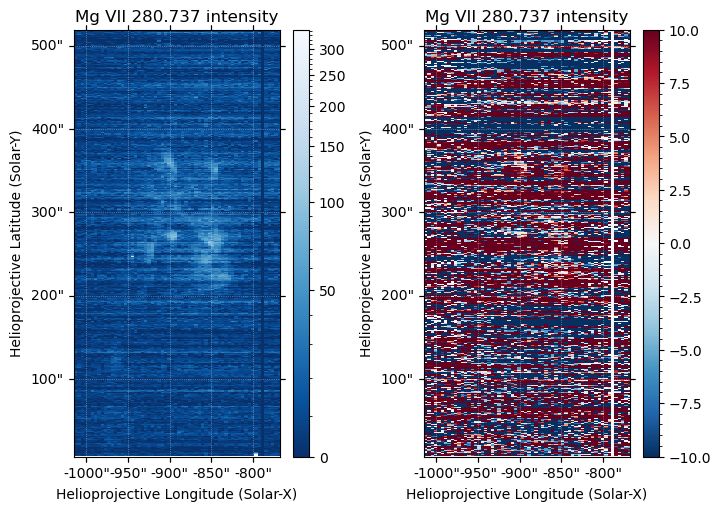

In [17]:
plot_dhb_int_and_vel(mg_07_280_1c_fitpath)

In [26]:
eis_auto_fit_sav = readsav("../../src/EIS/DHB_007_v2/20221020T2343/idl_l0_l1/eis_auto_fit_res_fe08_09_10.sav",verbose=True)

--------------------------------------------------
Date: Wed Jul 10 23:44:53 2024
User: yjzhu
Host: NB-RES-YINGJIE
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.3
--------------------------------------------------
Successfully read 7 records of which:
 - 1 are of type TIMESTAMP
 - 4 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - vel_feviii_185 [<class 'numpy.ndarray'>]
 - vel_feix_188 [<class 'numpy.ndarray'>]
 - vel_feix_197 [<class 'numpy.ndarray'>]
 - vel_fex_184 [<class 'numpy.ndarray'>]
--------------------------------------------------


In [27]:
eis_auto_fit_vel_fe_09_197 = eis_auto_fit_sav["vel_feix_197"]
eis_auto_fit_vel_fe_09_197 = eis_auto_fit_vel_fe_09_197 - np.nanmedian(eis_auto_fit_vel_fe_09_197,axis=0)[np.newaxis,:]
eis_auto_fit_vel_fe_08_185 = eis_auto_fit_sav["vel_feviii_185"]
eis_auto_fit_vel_fe_08_185 = eis_auto_fit_vel_fe_08_185 - np.nanmedian(eis_auto_fit_vel_fe_08_185,axis=0)[np.newaxis,:]
eis_auto_fit_vel_fe_10_184 = eis_auto_fit_sav["vel_fex_184"]
eis_auto_fit_vel_fe_10_184 = eis_auto_fit_vel_fe_10_184 - np.nanmedian(eis_auto_fit_vel_fe_10_184,axis=0)[np.newaxis,:]

In [28]:
fe_09_197_velmap.meta

MetaDict([('bunit': 'km/s')
('cdelt1': '3.9935998916625977')
('cdelt2': '1.0')
('cname1': 'Solar-X')
('cname2': 'Solar-Y')
('crpix1': '1')
('crpix2': '1')
('crval1': '-1013.2349462509155')
('crval2': '-10.096633911132812')
('ctype1': 'HPLN-TAN')
('ctype2': 'HPLT-TAN')
('cunit1': 'arcsec')
('cunit2': 'arcsec')
('date_avg': '2022-10-21T01:40:40.500')
('date_beg': '2022-10-21T01:08:42.000')
('date_end': '2022-10-21T02:12:39.000')
('date_obs': '2022-10-21T01:08:42.000')
('dsun_obs': '148950143177.84613')
('fovx': '247.60319328308105')
('fovy': '512.0')
('hgln_obs': '0.0')
('hglt_obs': '5.419443687660178')
('instrume': 'EIS')
('line_id': 'Fe IX 197.862')
('measrmnt': 'velocity')
('naxis': '2')
('naxis1': '62')
('naxis2': '512')
('nraster': '62')
('obstitle': 'Solar Orbiter coordinated observations of long-term monitoring of a&')
('sci_obj': 'AR                                                                 &')
('slit_id': '2"')
('slit_ind': '2')
('stud_acr': 'DHB_007_v2')
('target': 'Activ

In [29]:
eis_auto_fit_fe_09_197_map_meta = deepcopy(fe_09_197_velmap.meta)

In [30]:
eis_auto_fit_fe_09_197_map_meta['cdelt2'] = 4.0
eis_auto_fit_fe_09_197_map_meta['naxis2'] = 128
eis_auto_fit_fe_09_197_map_meta['crval2'] = eis_auto_fit_fe_09_197_map_meta['crval2'] + 1.5*eis_auto_fit_fe_09_197_map_meta['cdelt2']

In [31]:
eis_auto_fit_fe_09_197_velmap = sunpy.map.Map(eis_auto_fit_vel_fe_09_197, eis_auto_fit_fe_09_197_map_meta)
eis_auto_fit_fe_09_197_velmap.plot_settings["norm"] = plt.Normalize(vmin=-15,vmax=15)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


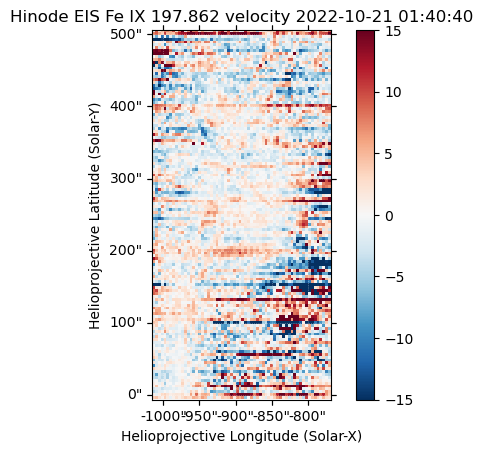

In [32]:
eis_auto_fit_fe_09_197_velmap.plot()
plt.colorbar()

In [33]:
eis_auto_fit_fe_10_184_map_meta = deepcopy(fe_10_184_velmap.meta)

In [34]:
eis_auto_fit_fe_10_184_map_meta['cdelt2'] = 4.0
eis_auto_fit_fe_10_184_map_meta['naxis2'] = 128
eis_auto_fit_fe_10_184_map_meta['crval2'] = eis_auto_fit_fe_10_184_map_meta['crval2'] + 1.5*eis_auto_fit_fe_10_184_map_meta['cdelt2']

In [35]:
eis_auto_fit_fe_10_184_map = sunpy.map.Map(eis_auto_fit_vel_fe_10_184, eis_auto_fit_fe_10_184_map_meta)
eis_auto_fit_fe_10_184_map.plot_settings["norm"] = plt.Normalize(vmin=-15,vmax=15)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


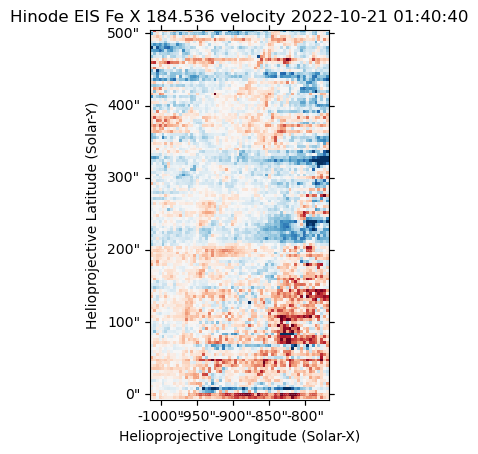

In [36]:
eis_auto_fit_fe_10_184_map.plot()

In [38]:
eis_auto_fit_fe_08_185_map_meta = deepcopy(fe_08_185_velmap.meta)

In [39]:
eis_auto_fit_fe_08_185_map_meta['cdelt2'] = 4.0
eis_auto_fit_fe_08_185_map_meta['naxis2'] = 128
eis_auto_fit_fe_08_185_map_meta['crval2'] = eis_auto_fit_fe_08_185_map_meta['crval2'] + 1.5*eis_auto_fit_fe_08_185_map_meta['cdelt2']

In [40]:
eis_auto_fit_fe_08_185_map = sunpy.map.Map(eis_auto_fit_vel_fe_08_185, eis_auto_fit_fe_08_185_map_meta)
eis_auto_fit_fe_08_185_map.plot_settings["norm"] = plt.Normalize(vmin=-20,vmax=20)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


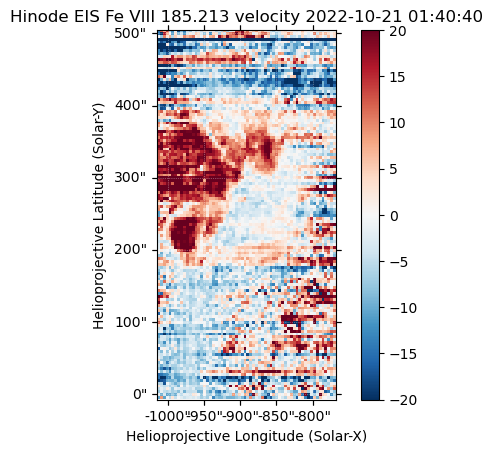

In [41]:
eis_auto_fit_fe_08_185_map.plot()
plt.colorbar()

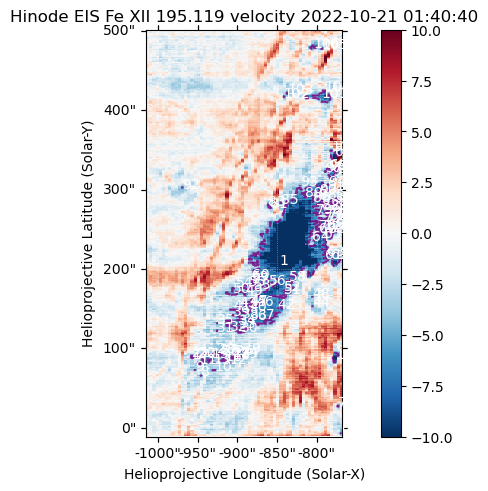

In [42]:
fig = plt.figure(layout='constrained')

ax = fig.add_subplot(111, projection=fe_12_195_vel_map)
fe_12_195_vel_map.plot(axes=ax)

cs = fe_12_195_vel_map.draw_contours(levels=[-5,]*fe_12_195_vel_map.unit,colors=["purple"],axes=ax,alpha=0.8)
plt.colorbar()

for ii, seg in enumerate(cs.allsegs[0]):
    ax.text(np.nanmean(seg, axis=0)[0], np.nanmean(seg, axis=0)[1], f'{ii}', color='white', fontsize=10)

# ax.set_xlim(0,20)
# ax.set_ylim(150,350)

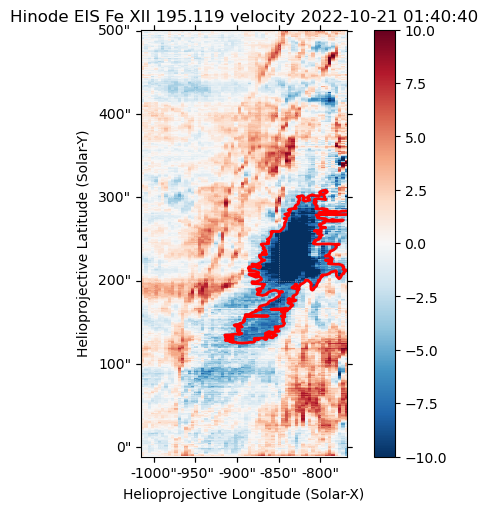

In [43]:
cs_selected_index = [1,2]
    
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=fe_12_195_vel_map)
fe_12_195_vel_map.plot(axes=ax)
plt.colorbar()

for ii in cs_selected_index:
    ax.plot(*cs.allsegs[0][ii].T, color='red', lw=2)

In [44]:
cs_skycoords = [fe_12_195_vel_map.pixel_to_world(np.concatenate((cs.allsegs[0][cs_selected_index[0]][:,0],
                                                                    cs.allsegs[0][cs_selected_index[1]][:,0]))*u.pix,
                                                    np.concatenate((cs.allsegs[0][cs_selected_index[0]][:,1],
                                                                    cs.allsegs[0][cs_selected_index[1]][:,1]))*u.pix) \
                ]
cs_regions = [PolygonSkyRegion(vertices=cs_skycoord) for cs_skycoord in cs_skycoords]

In [45]:
fe_12_195_vel_cs0 = get_vel_from_cs_regions(fe_12_195_vel_map, cs_regions)
fe_08_185_vel_cs0 = get_vel_from_cs_regions(eis_auto_fit_fe_08_185_map, cs_regions)
fe_09_197_vel_cs0 = get_vel_from_cs_regions(eis_auto_fit_fe_09_197_velmap, cs_regions)
fe_10_184_vel_cs0 = get_vel_from_cs_regions(eis_auto_fit_fe_10_184_map, cs_regions)
fe_11_188_vel_cs0 = get_vel_from_cs_regions(fe_11_188_vel_map, cs_regions)
fe_13_202_vel_cs0 = get_vel_from_cs_regions(fe_13_202_vel_map, cs_regions)
si_07_275_vel_cs0 = get_vel_from_cs_regions(si_07_275_vel_map, cs_regions)


In [46]:
with h5py.File('../../sav/EIS/Doppler/west_upflow_doppler_violin.h5', 'w') as hf:
    hf.create_dataset("fe_12_195",  data=fe_12_195_vel_cs0)
    hf.create_dataset("fe_08_185",  data=fe_08_185_vel_cs0)
    hf.create_dataset("fe_09_197",  data=fe_09_197_vel_cs0)
    hf.create_dataset("fe_10_184",  data=fe_10_184_vel_cs0)
    hf.create_dataset("fe_11_188",  data=fe_11_188_vel_cs0)
    hf.create_dataset("fe_13_202",  data=fe_13_202_vel_cs0)
    hf.create_dataset("si_07_275",  data=si_07_275_vel_cs0)